# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_excel('geo_comment.xlsx')


In [3]:
data.head()

,Unnamed: 0,x,y,comment_class,multiplier,comment
0,0,37.612416,55.777454,-1,1,Во все разделы правил землепользования и застр...
1,1,37.612416,55.777454,-1,1,На основании вступившего в законную силу судеб...
2,2,37.603298,55.742108,-1,1,Внести в Проект правил землепользования и заст...
3,3,37.558526,55.728758,-1,1,Учитывая социальную значимость проекта строите...
4,4,37.566431,55.731794,-1,1,Учитывая социальную значимость проекта строите...


In [4]:
data_xy = data[['x', 'y']].copy()
y = data['y'].copy()
data_xy_POZ = data[data['comment_class']==1][['x', 'y']].copy()
data_xy_NEG = data[data['comment_class']==-1][['x', 'y']].copy()

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_xy)

In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score


Визуально разделим город на районы безотносительно голосов (провести кластеризацию и вывести картинку)

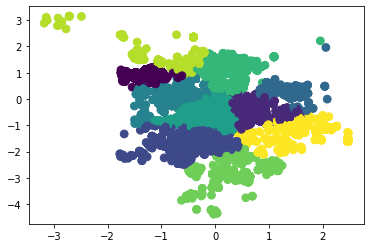

In [25]:
# выберем кластеры по количеству адм.округов Москвы = 10/ (без новой Москвы)
clusters = KMeans(n_clusters=10, random_state=0).fit_predict(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, s=60)
None

Полученные кластеры немного отличаются от административных районов Москвы

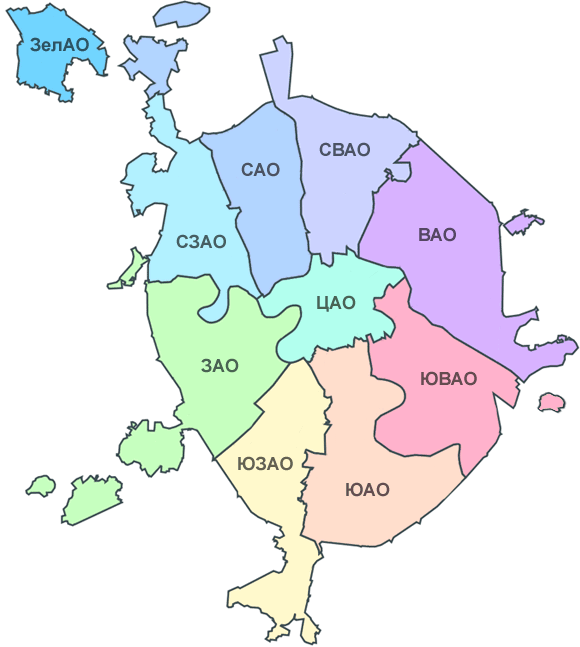

In [30]:
from IPython.display import Image
Image(filename='moskva.png', width=250) 

Аналогично исследуем скопления голосов за и против отдельно

In [8]:

X_scaled_POZ = StandardScaler().fit_transform(data_xy_POZ)
X_scaled_NEG = StandardScaler().fit_transform(data_xy_NEG)

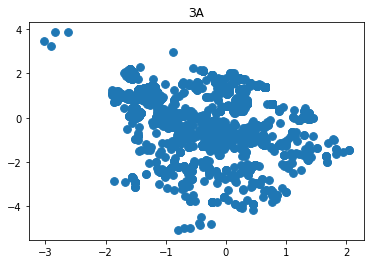

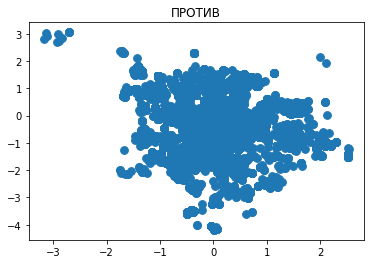

In [32]:
plt.scatter(X_scaled_POZ[:, 0], X_scaled_POZ[:, 1],  cmap='autumn', s=60)
plt.title('ЗА')
plt.show()

plt.scatter(X_scaled_NEG[:, 0], X_scaled_NEG[:, 1], cmap='autumn', s=60)
plt.title('ПРОТИВ')
plt.show()

Голоса "Против" покрывают большую площадь, чем "за"

Подоберем оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)

In [40]:
k_inertia = []
ks = range(1, 11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    k_inertia.append(clf_kmeans.inertia_)

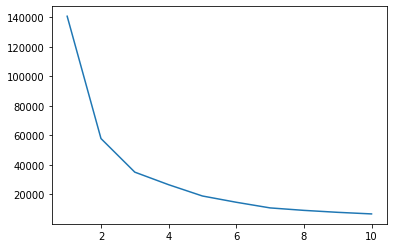

In [44]:
plt.plot(ks, k_inertia)
plt.show()


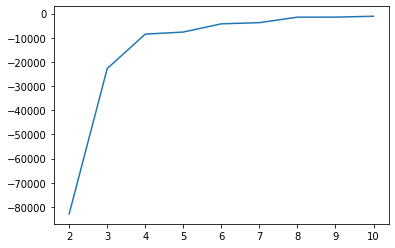

In [35]:
diff = np.diff(k_inertia)
plt.plot(ks[1:], diff)

Теперь можно найти оптимальное число кластеров по этой формуле:

$$k_{opt} = argmin(\frac{inertia_{k+1}-inertia_{k}}{inertia_{k}-inertia_{k-1}})$$

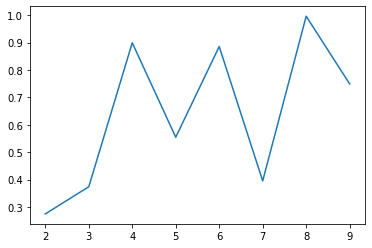

In [55]:
diff_r = diff[1:] / diff[:-1]
plt.plot(ks[1:-1], diff_r)
None

In [56]:
k_opt = ks[np.argmin(diff_r) + 1]
k_opt

2

 Расчет из тетрадки показывает, что оптимальное кол-во кластеров 2

Выберем оптимальное кол-во кластеров с помощью Silhouette Coefficient.

 !!!!!!!Расчет долгий

In [49]:
from sklearn.metrics import silhouette_score
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(X_scaled)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X_scaled, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.5485411297060114
For n_clusters=3, The Silhouette Coefficient is 0.5396454136506637
For n_clusters=4, The Silhouette Coefficient is 0.5503865970993086
For n_clusters=5, The Silhouette Coefficient is 0.5564840535505157
For n_clusters=6, The Silhouette Coefficient is 0.5672976122901152
For n_clusters=7, The Silhouette Coefficient is 0.5997821442840703
For n_clusters=8, The Silhouette Coefficient is 0.6163903011047722
For n_clusters=9, The Silhouette Coefficient is 0.614644146011288
For n_clusters=10, The Silhouette Coefficient is 0.6044282996176182


Silhouette Coefficient показывает оптимальное кол-во кластеров 8, т.к. имеет наибольшее значение

### Дополнительные задания

найти наиболее активные в голосовании районы (подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')

In [71]:
data_xy['mul'] = data['multiplier']
X_scaled_mul = scaler.fit_transform(data_xy)

Wall time: 1min 1s


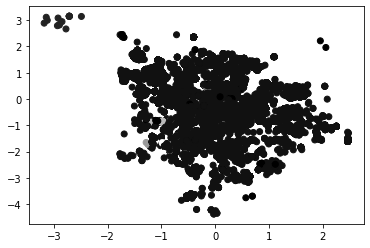

In [70]:
%%time
from sklearn.cluster import DBSCAN
clusters = DBSCAN(n_jobs=-1).fit_predict(X_scaled_mul)
plt.scatter(X_scaled_mul[:, 0], X_scaled_mul[:, 1], cmap='gray', c=clusters)
None

для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [129]:
import re

In [141]:
f = lambda x: re.sub(r'[^\w\s]+|[\d]+', r'', x).strip()
dt['comment'] = data['comment'].copy()
dt2['comment'] = dt['comment'].apply(f)

In [262]:
from sklearn.feature_extraction.text import CountVectorizer
stop_words = ['на', 'по', 'для', 'ппз', 'от', ]
count_vect = CountVectorizer(analyzer='word', stop_words=stop_words, ngram_range=(2, 2))
X_train_counts = count_vect.fit_transform(dt2['comment'])
X_train_counts.shape

(70382, 168393)

In [263]:
# чтобы узнать количественное вхождение каждого слова:
matrix_freq = np.asarray(X_train_counts.sum(axis=0)).ravel()
final_matrix = np.array([np.array(count_vect.get_feature_names()), matrix_freq])

In [265]:
df3 = pd.DataFrame(final_matrix).T
df3[1] = pd.to_numeric(df3[1])
df3.sort_values(by=1, ascending=False, inplace=True)
print('ОСНОВНЫЕ ТЕМАТИКИ')
df3.head(20)

ОСНОВНЫЕ ТЕМАТИКИ


,0,1
20905,города москвы,200385
41808,землепользования застройки,182242
104685,правил землепользования,152381
116307,публичных слушаний,120617
119213,разрешенного использования,115318
41677,земельных участков,112200
116283,публичные слушания,72249
22288,градостроительного кодекса,67681
51085,капитального строительства,64450
41558,земельного участка,61833
